# Statistics and Probability
## First Block

We have the following p.d.f. $\frac{d\Gamma}{d\cos\theta}$ with a parameter $P_{\mu} \in [-1,1]$

$$
\frac{d\Gamma}{d\cos\theta}=\frac{1}{2}\big(1-\frac{1}{3}P_{\mu}\cos\theta\big)
$$

The variable $\theta$ represents the angle between the muon and electron polarizations, thus $\theta \in [-\pi,0]$ which means that $\cos \theta \in [-1,1]$. It can be checked that this function fulfills all the conditions in order to be a p.d.f. 

#### 1. Positive Semi-Defined Function
Both $P_{\mu}$ and $\cos \theta$ are constrained in the interval $[-1,1]$. Therefore:

\begin{eqnarray}
\frac{1}{2}\big(1-\frac{1}{3}\big) \leqslant & \frac{1}{2}\big(1-\frac{1}{3}P_{\mu}\cos\theta\big) & \leqslant \frac{1}{2}\big(1-\frac{-1}{3}\big) \\
\frac{1}{3} \leqslant & \frac{1}{2}\big(1-\frac{1}{3}P_{\mu}\cos\theta\big) & \leqslant \frac{2}{3}
\end{eqnarray}


#### 2. Normalized Function
To simplify the calculations, we will use $\cos \theta$ as our variable. 

\begin{eqnarray}
\int_{-1}^{1} \frac{1}{2}\big(1-\frac{1}{3}P_{\mu}\cos\theta\big) d\cos\theta = \frac{1}{2}\int_{-1}^{1} d\cos\theta -\frac{1}{6}P_{\mu}\int_{-1}^{1} \cos\theta d\cos\theta = \Big[\frac{1}{2}\cos\theta-\frac{1}{12}P_{\mu}\cos^2\theta \Big]_{-1}^{1}=\frac{1}{2}(1-(-1))-\frac{1}{12}P_{\mu}(1-(-1)^2)=1
\end{eqnarray}


#### 3. Plot of the PDF
Let's now plot the normalized differential probability density function $\frac{d\Gamma}{d\cos\theta}$. First, we will initialize several Python libraries which we be useful during this problem set. 

In [1]:
# sets the plots to be embedded in the notebook
%matplotlib inline 

# Import useful python libraries 
import numpy as np # library to work with arrays
import matplotlib.pyplot as plt # plotting library (all weird commands starting with plt., ax., fig. are matplotlib
                                # they are not important, the define plots and set labels, axis...)
import random # (pseudo-)random numbers generation
import scipy.stats as stat # extra statistical functions (the basic are included in numpy)

Define the $\frac{d\Gamma}{d\cos\theta}$ function, using the angle $\theta$ and the muon polarization $P_{\mu}$ as input variables:

In [2]:
def gamma(cost,Pmu):
    dg=.5*(1-Pmu*cost/3)
    return dg

We are now ready to plot the $d\Gamma$ probability density function.

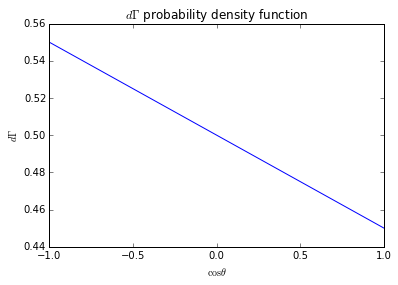

In [3]:
# Define parameters
Pmu=0.3
# Define plot variables
cost=np.linspace(-1,1,201)
dG=gamma(cost,Pmu)
# Plot
fig=plt.figure(1)
ax=fig.add_subplot(111)
ax.plot(cost,dG)
ax.set_title('$d\Gamma$ probability density function')
ax.set_xlabel(r'$\cos\theta$')
ax.set_ylabel('$d\Gamma$')

[Mariona]: I've never really used the ax. command because it increases the 
complexity of the code quite significantly. I've written below how i'd personally plot the figure, which consists on using the regular plt. command. If you try it out, you'll see we get the same results!: 

In [4]:
'''
plt.figure(1)
plt.plot(cost, dG)
plt.title('$d\Gamma$ probability density function')
plt.xlabel(r'$\cos\theta$')
plt.ylabel('$d\Gamma$')
'''

"\nplt.figure(1)\nplt.plot(cost, dG)\nplt.title('$d\\Gamma$ probability density function')\nplt.xlabel(r'$\\cos\theta$')\nplt.ylabel('$d\\Gamma$')\n"

# 2. Build a Monte Carlo able to generate this PDF 


[Oriol]: Nota sobre python y los bucles: Python es muy bonito y simple, pero se le atragantan un poco los bucles. Por suerte, numpy esta hecho en C, cosa que agiliza muchísimo la ejecución. Tanto en el try-teject como en el inverse function hay una comparación. Teneis que descomentar el timeit para ver la comparación de tiempo y comentarlo para poderlo ejecutar correctamente.

### Try-Reject p.d.f generation

We will construct our Monte Carlo with the Try-Reject method.

Without using Numpy explicitly:

In [5]:
#%%timeit # returns the elapsed time when executing the cell, it executes the cell more than once, 
         # thus, it should only be uncommented when desired
# Montecarlo try-reject
N=10000000 
# Define fmax
# The goal is to have the lowest fmax possible in order to increase the efficiency of the try-reject, knowing 
# the shape of the p.d.f. this can be trivially done, because we know its maximum value must be either at 1 or -1
fmax=max(gamma(-1,Pmu),gamma(1,Pmu))

Xi1=np.empty(N) # Declaring an array instead of making it grow inside a loop speeds a lot the computation time
i=0
while i<N:
    # 1st step of the try reject, choose a point inside the area [a,b]x[0,fmax]
    r=random.random()
    x=-1+2*r
    y=random.random()*fmax
    # 2nd step, check if it is inside the p.d.f. area and save x€[a,b] to Xi1, otherwise, reject it
    if gamma(x,Pmu)>=y:
        Xi1[i]=x
        i+=1

Using Numpy:

In [6]:
#%%timeit
N=10000000
# 1st step of the try reject, choose a point inside the area [a,b]x[0,fmax]
# now, all N desired number are generated at once with numpy, thus, as some of them will be rejected, 2*N 
# random numbers are generated
x=-1+2*np.random.random(2*N)           
y=fmax*np.random.random(2*N)
# 2nd step, check if it is inside the p.d.f. area and save x€[a,b] to Xi1, otherwise, reject it
# in addition, as  2*N were generated in order to be safe and less than N x values will have been rejected
# a sample of size N must be chosen in order to compare with the other methods.
Xi2=x[y<=gamma(x,Pmu)][:N]

Plot the results of the Try-Reject Method:

(0.4, 0.6)

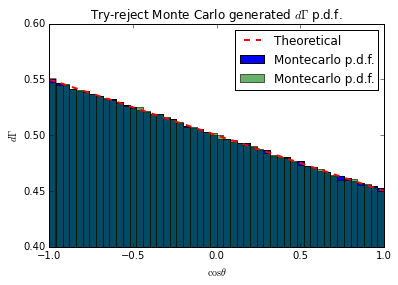

In [7]:
fig=plt.figure(2)
ax=fig.add_subplot(111)
ax.hist(Xi1,color='b',normed=1,bins=50,label='Montecarlo p.d.f.')
ax.hist(Xi2,color='g',normed=1,bins=50,label='Montecarlo p.d.f.',alpha=0.6)
ax.plot(cost,dG,'r--',linewidth=2,label='Theoretical')
ax.set_title('Try-reject Monte Carlo generated $d\Gamma$ p.d.f.')
ax.set_xlabel(r'$\cos\theta$')
ax.set_ylabel('$d\Gamma$')
ax.legend()
ax.set_ylim([0.4,0.6])

### Inverse function p.d.f. generation
To generate a p.d.f via the inverse method we need the inverse of the cumulative function. The cumulative function was found in the first question while checking that the p.d.f. was normalized, thus:

$$
F(\cos\theta)=\Big[\frac{1}{2}z-\frac{1}{12}P_{\mu}z^2 \Big]_{-1}^{\cos\theta}=\frac{1}{2}(\cos\theta+1)-\frac{1}{12}P_{\mu}(\cos^2\theta-1) 
$$

$$
\frac{P_{\mu}}{12}\cos^2\theta-\frac{\cos\theta}{2}+r-\frac{1}{2}-\frac{P_{\mu}}{12}=0 \quad \rightarrow \quad F^{-1}(r)=\cos\theta=\frac{3}{P_{\mu}}\pm \frac{6}{P_{\mu}}\sqrt{\frac{1}{4}-\frac{P_{\mu}}{3}(r-\frac{1}{2}-\frac{P_{\mu}}{12})}
$$

In [8]:
# Inverse function F^{-1}(r) implemented in Python
def Finv(r,Pmu): 
    # its arguments are:
    #     r   : either int, float or np.array. Must be a value between 0 and 1
    #     Pmu : either int, float or np.array, its shape must be compatible with r in case of arrays
    cost=(3.-6.*np.sqrt(.25-Pmu/3.*(r-.5-Pmu/12)))/Pmu
    return cost

(without numpy explicitely)

In [9]:
#%%timeit
N=10000000
Xinv1=np.empty(N)
for i in xrange(N):
    r=random.random()
    Xinv1[i]=Finv(r,Pmu)

(with numpy magic)

In [10]:
# Montecarlo inverse function
def Montecarlo_inv_fun(Pmu,N=1000000):
    # its arguments are:
    #     Pmu : np.array containing the value or values of Pmu for which the pdf will be generated
    # Optional arguments:
    #     N   : int, number of values in the pdf sample
    m=len(Pmu)
    #v.1
    PmuV=np.array([Pmu]) #Transform Pmu into an 1xm matrix so that it matches the dimensions of r (Nxm)
    r=np.random.random((N,m))
    #v.2
    #PmuV=np.empty((m,1))
    #PmuV[:,0]=Pmu
    #r=np.random.random((m,N))
    Xinv=Finv(r,PmuV)
    return Xinv

In [11]:
Xinv2=Montecarlo_inv_fun(np.array([Pmu]),10000000)[:,0] 
# Now, in order to make the function compatible with arrays, Pmu must be reshaped into a np.array and 
# afterwards, the obtained sample is converted from Nx1 matrix to vector of length N

[Oriol] The execution time of the code without using numpy own methods is 18 seconds, whereas knowing numpy reduces it to 0.45 seconds (results with my computer with many things opened)

(0.4, 0.6)

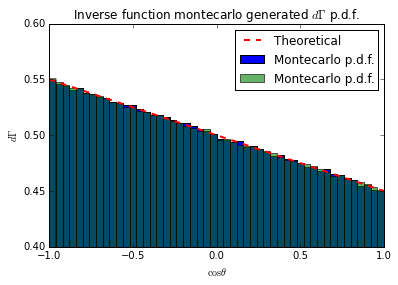

In [12]:
#Plot for the inverse function method
fig=plt.figure(2)
ax=fig.add_subplot(111)
ax.hist(Xinv1,color='b',normed=1,bins=50,label='Montecarlo p.d.f.')
ax.hist(Xinv2,color='g',normed=1,bins=50,label='Montecarlo p.d.f.',alpha=0.6)
ax.plot(cost,dG,'r--',linewidth=2,label='Theoretical')
ax.set_title('Inverse function montecarlo generated $d\Gamma$ p.d.f.')
ax.set_xlabel(r'$\cos\theta$')
ax.set_ylabel('$d\Gamma$')
ax.legend()
ax.set_ylim([0.4,0.6])

### Estimate distribution parameters
In this section, the rellevant parameters of the p.d.f. will be estimated from the montecarlo generated sample. To be able to compare this values, the theoretical values will also be obtained:

$$
\int_{-1}^{1} \frac{1}{2}\big(1-\frac{1}{3}P_{\mu}\cos\theta\big) \cos\theta d\cos\theta = \Big[\frac{\cos^2\theta}{4}-\frac{P_{\mu}}{6}\frac{\cos^3\theta}{3}\Big]_{-1}^{1}=\frac{-P_{\mu}}{9}
$$

In [13]:
mu=np.mean(Xinv2)
sigma=np.std(Xinv2) # equivalent to np.sqrt(np.var(Xi1))
skewness=stat.skew(Xinv2)
kurtosis=stat.kurtosis(Xinv2)

print 'The try-reject montecarlo generated distribution has:\n\tmean = %.6f,\n\t\
sigma = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu, sigma, skewness, kurtosis)

The try-reject montecarlo generated distribution has:
	mean = -0.033137,
	sigma = 0.576543,
	skewness = 0.068607
	and kurtosis = -1.192740


# Part 3
The $\frac{d\Gamma}{d\cos\theta}$ mean depends on the polarisation $P_{\mu}$ in a simple manner: theoretical mean = -$P_{\mu}$/9. 

### 3.1. Show that the Monte Carlo predicts this dependency by changing the value of $P_{\mu}$

In [14]:
N=int(1e7)
PmuVec=np.linspace(-1,1,30)  # array of Pmu valus for which the pdf sample will be generated
X=Montecarlo_inv_fun(PmuVec,N) # call Montecarlo_inv_fun, which returns a matrix, containing N x values
# following the pdf of each Pmu in PmuVec
mu=np.mean(X,axis=0) # estimate the mean for each Pmu, thus, the result is a vector of the same length as PmuVec 
muTh=-PmuVec/9. # calculate the theoretical mean for each Pmu

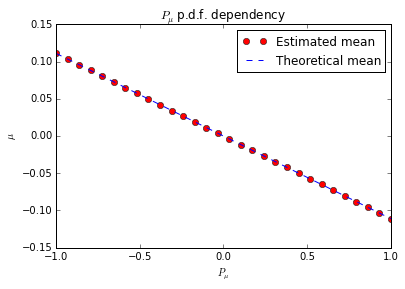

In [15]:
fig=plt.figure(1)
ax=fig.add_subplot(111)
ax.plot(PmuVec,mu,'ro',PmuVec,muTh,'b--')
ax.set_title('$P_{\mu}$ p.d.f. dependency')
ax.set_xlabel(r'$P_{\mu}$')
ax.set_ylabel('$\mu$')
ax.legend(['Estimated mean','Theoretical mean'])

### 3.2. What is the variance of the parameter $P_{\mu}$? Compute it numerically using Monte Carlo techniques for a given $P_{\mu}$ value.

Perform Monte Carlo simulation for a given Pmu value (called "Pmu_chosen_value") and sample size. We will obtain a vector $X = \{x_{1}, x_{2}, ...., x_{N}\}$

In [30]:
sample_size = int(1e7)
Pmu_chosen_value = 0.5 #Choose a value of Pmu for this exercise
vec_length = 50  # Choose the length of the array "get_PmuVec"
get_PmuVec = np.ones(vec_length)*Pmu_chosen_value  # Create vector with length = 50 filled with a given Pmu value from which the pdf sample will be generated

get_Pmus = Montecarlo_inv_fun(get_PmuVec, sample_size) # call Montecarlo_inv_fun, which returns a matrix with dimensions (sample_size X vec_length), containing x values
# following the pdf of each Pmu_chosen_value in get_PmuVec

Calculate the variance of the estimated Pmu both with the estimated mu and the theoretical mu and compare them.

In [33]:
estimated_mean = np.mean(get_Pmus, axis=0) #Get estimated mean 
estimated_Pmu = -9*estimated_mean  # estimate the mean for each Pmu. The result is a vector of the same length as PmuVec 
variance1 = np.var(estimated_Pmu, ddof = 1) #Estimate the variance of the estimated Pmu. The "ddof" is used so that the division is not done as 1/N but as 1/N-1
variance2 = (sum((estimated_Pmu-Pmu_chosen_value)**2))/vec_length 
print variance1 
print variance2 

2.00961786377e-06
1.99115966808e-06


We define the variance as: $$Var(X)=E[(x-\mu)^{2}]$$ 

With the `sum` command, we are obtaining the variance with: $$\overline{Var}=\frac{1}{N}\sum(P_{i}-\mu)^{2}$$ where $\mu$ is the theoretical mean. In this case, we have chosen a specific value for Pmu (Pmu_chosen_value = 0.5), so the theoretical mean will simply correspond to this value. 

With the `np.var` command, we are calculating the variance with equation: $$\overline{Var}=\frac{1}{N-1}\sum(P_{i}-\overline{x})$$ 

where $\bar{x}$ is the estimated mean, i.e. $\bar{x}=\frac{1}{N}\sum x_{i}$. Note that `np.var` accepts "delta Degrees of freedom" (ddof) which refers to the factor $1/N-\text{ddof}$. We chose $ddof = 1$ so that the division would be as 1/N-1, instead of 1/N.


 

# Part 4
Generate a continuous series of N events using the Monte Carlo and compute the mean of the distribution and the estimated $P_{\mu}$ as 9*mean. 

### 4.1. Show that the $P_{\mu}$ tends to the true evalue as predicted by the law of large numbers